# Distribution of influences

To get a grip on how much randomness influences the results, we run the same model lots of times and compare the results.

In [5]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [3]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=6_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_baseline'


# Baseline

Lasketaan työllisyysasteet nykymallissa.

In [4]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_distrib(n=50,startn=45,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/baseline/distrib_base',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

Parameters of lifecycle:
timestep 0.25
gamma 0.92 per anno
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True

computing 45
train...
phase 1


KeyboardInterrupt: 

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



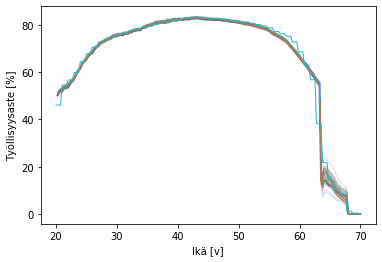

best_emp 7
Vaikutus työllisyyteen keskiarvo 2066998 htv, mediaani 2067768 htv std 5749 htv
   keskiarvo 2231844 työllistä, mediaani 2231887 työllistä, std 6485 työllistä


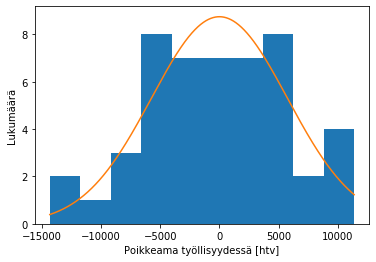

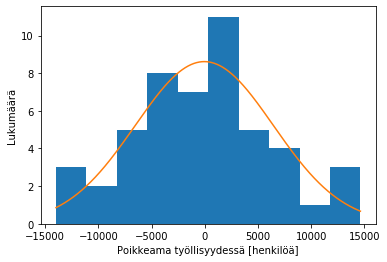

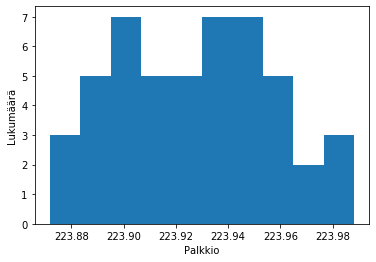

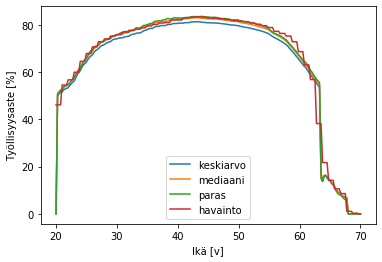

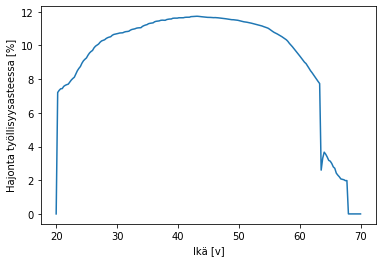

In [9]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/baseline/distrib_base_v',n=49,stats_results='results/baseline/distrib_stats')

# Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

In [ ]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
poistomalli='best/putki/malli_putki'
cc1_putki.run_distrib(n=50,startn=20,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=poistomalli,plot=True,cont=True,start_from=perusmalli,results='results/putki/distrib_poisto',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)
cc2.render_distrib(load='results/putki/distrib_poisto_v',n=2,startn=0,stats_results='results/putki/distrib_poisto_stats')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

computing 20
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3423     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0168  |
| total_timesteps    | 0        |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.92     |
| fps                | 3691     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 0.374    |
| total_timesteps    | 196353   |
| value_

---------------------------------
| explained_variance | 0.999    |
| fps                | 3565     |
| nupdates           | 260      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.016   |
| total_timesteps    | 5650603  |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3568     |
| nupdates           | 270      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0144  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0122   |
---------------------------------
done
simulating  best/putki/malli_putki_v120
predicting...


computing 21
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3469     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0156  |
| total_timesteps    | 0        |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.863    |
| fps                | 3755     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.269   |
| total_timesteps    | 196353   |
| value_loss         | 1.71     |
---------------------------------
---------------------------------
| explained_variance | 0.838    |
| fps                | 3695     |
| nupdates           | 20       |
| policy_entropy     | 0.989    |
| policy_loss        | 0.429    |
| total_timesteps    | 414523   |
| value_loss         | 2.1      |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3621     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0131  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0152   |
---------------------------------
done
simulating  best/putki/malli_putki_v121
predicting...


computing 22
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3466     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0117  |
| total_timesteps    | 0        |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.673    |
| fps                | 3737     |
| nupdates           | 10       |
| policy_entropy     | 0.989    |
| policy_loss        | -0.859   |
| total_timesteps    | 196353   |
| value_loss         | 4.83     |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 3686     |
| nupdates           | 20       |
| policy_entropy     | 0.977    |
| policy_loss        | -0.0527  |
| total_timesteps    | 414523   |
| value_loss         | 0.526    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3626     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.012   |
| total_timesteps    | 5868773  |
| value_loss         | 0.0121   |
---------------------------------
done
simulating  best/putki/malli_putki_v122
predicting...


computing 23
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3448     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0194  |
| total_timesteps    | 0        |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.432    |
| fps                | 3731     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 1.33     |
| total_timesteps    | 196353   |
| value_loss         | 8.53     |
---------------------------------
---------------------------------
| explained_variance | 0.875    |
| fps                | 3679     |
| nupdates           | 20       |
| policy_entropy     | 0.986    |
| policy_loss        | -0.443   |
| total_timesteps    | 414523   |
| value_loss         | 1.79     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3632     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0106  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0155   |
---------------------------------
done
simulating  best/putki/malli_putki_v123
predicting...


computing 24
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3508     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0139  |
| total_timesteps    | 0        |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.308    |
| fps                | 3753     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.828   |
| total_timesteps    | 196353   |
| value_loss         | 9.37     |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps                | 3684     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | 0.66     |
| total_timesteps    | 414523   |
| value_loss         | 1.26     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3630     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0102  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0122   |
---------------------------------
done
simulating  best/putki/malli_putki_v124
predicting...


computing 25
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3410     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0169  |
| total_timesteps    | 0        |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.843    |
| fps                | 3742     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.801    |
| total_timesteps    | 196353   |
| value_loss         | 2.56     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 3674     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0928  |
| total_timesteps    | 414523   |
| value_loss         | 0.461    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3626     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0113  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0156   |
---------------------------------
done
simulating  best/putki/malli_putki_v125
predicting...


computing 26
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3444     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0138  |
| total_timesteps    | 0        |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 3749     |
| nupdates           | 10       |
| policy_entropy     | 0.983    |
| policy_loss        | -0.294   |
| total_timesteps    | 196353   |
| value_loss         | 0.788    |
---------------------------------
---------------------------------
| explained_variance | 0.935    |
| fps                | 3683     |
| nupdates           | 20       |
| policy_entropy     | 0.986    |
| policy_loss        | 0.561    |
| total_timesteps    | 414523   |
| value_loss         | 1.19     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3635     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0125  |
| total_timesteps    | 5868773  |
| value_loss         | 0.015    |
---------------------------------
done
simulating  best/putki/malli_putki_v126
predicting...


computing 27
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3418     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0155  |
| total_timesteps    | 0        |
| value_loss         | 0.0163   |
---------------------------------
---------------------------------
| explained_variance | 0.871    |
| fps                | 3747     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 0.667    |
| total_timesteps    | 196353   |
| value_loss         | 2.04     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 3687     |
| nupdates           | 20       |
| policy_entropy     | 0.982    |
| policy_loss        | -0.196   |
| total_timesteps    | 414523   |
| value_loss         | 0.526    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3628     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0154  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0132   |
---------------------------------
done
simulating  best/putki/malli_putki_v127
predicting...


computing 28
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3372     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0197  |
| total_timesteps    | 0        |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 0.395    |
| fps                | 3728     |
| nupdates           | 10       |
| policy_entropy     | 0.984    |
| policy_loss        | 1.49     |
| total_timesteps    | 196353   |
| value_loss         | 9.53     |
---------------------------------
---------------------------------
| explained_variance | 0.772    |
| fps                | 3680     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -1.01    |
| total_timesteps    | 414523   |
| value_loss         | 3.74     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3625     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00733 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0159   |
---------------------------------
done
simulating  best/putki/malli_putki_v128
predicting...


computing 29
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3439     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00911 |
| total_timesteps    | 0        |
| value_loss         | 0.00997  |
---------------------------------
---------------------------------
| explained_variance | 0.669    |
| fps                | 3759     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | -0.345   |
| total_timesteps    | 196353   |
| value_loss         | 4.19     |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 3693     |
| nupdates           | 20       |
| policy_entropy     | 0.976    |
| policy_loss        | 0.212    |
| total_timesteps    | 414523   |
| value_loss         | 0.623    |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 3642     |
| nupdates           | 270      |
| policy_entropy     | 0.988    |
| policy_loss        | -0.00647 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0185   |
---------------------------------
done
simulating  best/putki/malli_putki_v129
predicting...


computing 30
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3427     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0216  |
| total_timesteps    | 0        |
| value_loss         | 0.0142   |
---------------------------------
---------------------------------
| explained_variance | 0.404    |
| fps                | 3739     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 1.59     |
| total_timesteps    | 196353   |
| value_loss         | 9.72     |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps                | 3683     |
| nupdates           | 20       |
| policy_entropy     | 0.98     |
| policy_loss        | 0.432    |
| total_timesteps    | 414523   |
| value_loss         | 0.977    |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 3641     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.0103  |
| total_timesteps    | 5868773  |
| value_loss         | 0.02     |
---------------------------------
done
simulating  best/putki/malli_putki_v130
predicting...


computing 31
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3466     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00865 |
| total_timesteps    | 0        |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.624    |
| fps                | 3763     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 1.45     |
| total_timesteps    | 196353   |
| value_loss         | 6.97     |
---------------------------------
---------------------------------
| explained_variance | 0.904    |
| fps                | 3702     |
| nupdates           | 20       |
| policy_entropy     | 0.978    |
| policy_loss        | -0.144   |
| total_timesteps    | 414523   |
| value_loss         | 1.24     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3649     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.017   |
| total_timesteps    | 5868773  |
| value_loss         | 0.0166   |
---------------------------------
done
simulating  best/putki/malli_putki_v131
predicting...


computing 32
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3469     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0148  |
| total_timesteps    | 0        |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.883    |
| fps                | 3767     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.607    |
| total_timesteps    | 196353   |
| value_loss         | 1.74     |
---------------------------------
---------------------------------
| explained_variance | 0.914    |
| fps                | 3705     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | -0.42    |
| total_timesteps    | 414523   |
| value_loss         | 1.23     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3647     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.017   |
| total_timesteps    | 5868773  |
| value_loss         | 0.0132   |
---------------------------------
done
simulating  best/putki/malli_putki_v132
predicting...


computing 33
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3486     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0141  |
| total_timesteps    | 0        |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.874    |
| fps                | 3742     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.537   |
| total_timesteps    | 196353   |
| value_loss         | 1.77     |
---------------------------------
---------------------------------
| explained_variance | 0.921    |
| fps                | 3699     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.618    |
| total_timesteps    | 414523   |
| value_loss         | 1.33     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3642     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0126  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0167   |
---------------------------------
done
simulating  best/putki/malli_putki_v133
predicting...


computing 34
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3503     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.0148  |
| total_timesteps    | 0        |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.734    |
| fps                | 3756     |
| nupdates           | 10       |
| policy_entropy     | 0.949    |
| policy_loss        | 0.752    |
| total_timesteps    | 196353   |
| value_loss         | 4.12     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 3706     |
| nupdates           | 20       |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0883  |
| total_timesteps    | 414523   |
| value_loss         | 0.458    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3644     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00589 |
| total_timesteps    | 5868773  |
| value_loss         | 0.0128   |
---------------------------------
done
simulating  best/putki/malli_putki_v134
predicting...


computing 35
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3409     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00698 |
| total_timesteps    | 0        |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.787    |
| fps                | 3724     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 0.275    |
| total_timesteps    | 196353   |
| value_loss         | 2.68     |
---------------------------------
---------------------------------
| explained_variance | 0.754    |
| fps                | 3678     |
| nupdates           | 20       |
| policy_entropy     | 0.979    |
| policy_loss        | -1.05    |
| total_timesteps    | 414523   |
| value_loss         | 4.08     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3637     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0128  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0123   |
---------------------------------
done
simulating  best/putki/malli_putki_v135
predicting...


computing 36
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3518     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.018   |
| total_timesteps    | 0        |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.85     |
| fps                | 3754     |
| nupdates           | 10       |
| policy_entropy     | 0.985    |
| policy_loss        | 0.495    |
| total_timesteps    | 196353   |
| value_loss         | 2.07     |
---------------------------------
---------------------------------
| explained_variance | 0.915    |
| fps                | 3698     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | -0.327   |
| total_timesteps    | 414523   |
| value_loss         | 1.14     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3609     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.0113  |
| total_timesteps    | 5868773  |
| value_loss         | 0.0131   |
---------------------------------
done
simulating  best/putki/malli_putki_v136
predicting...


computing 37
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3442     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0177  |
| total_timesteps    | 0        |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.897    |
| fps                | 3764     |
| nupdates           | 10       |
| policy_entropy     | 0.984    |
| policy_loss        | -0.737   |
| total_timesteps    | 196353   |
| value_loss         | 1.86     |
---------------------------------
---------------------------------
| explained_variance | 0.898    |
| fps                | 3695     |
| nupdates           | 20       |
| policy_entropy     | 0.971    |
| policy_loss        | 0.579    |
| total_timesteps    | 414523   |
| value_loss         | 1.66     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 3630     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00987 |
| total_timesteps    | 5868773  |
| value_loss         | 0.018    |
---------------------------------
done
simulating  best/putki/malli_putki_v137
predicting...


computing 38
train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 3294     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0164  |
| total_timesteps    | 0        |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.85     |
| fps                | 3586     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | 0.76     |
| total_timesteps    | 196353   |
| value_loss         | 2.41     |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 3550     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.162   |
| total_timesteps    | 414523   |
| value_loss         | 0.561    |
-------------------------------

In [ ]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
#cc1_putki_b.render_distrib(load='results/putki/distrib_poisto_v')
cc1_putki_b.compare_distrib('results/putki/distrib_base_v','results/putki/distrib_poisto_v')                    


# Porrastus

In [3]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,randomness=randomness,porrasta_putki=True)
porrasmalli='best/porrastus/malli_porrastus'
cc2_porras.run_distrib(n=50,startn=43,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,
                save=porrasmalli,plot=True,cont=True,start_from=perusmalli,results='results/porrastus/distrib_porras',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

computing 23
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.998    |
| fps                | 1706     |
| nupdates           | 1        |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0188  |
| total_timesteps    | 0        |
| value_loss         | 0.0212   |
-----------------------------

---------------------------------
| explained_variance | 0.997    |
| fps                | 2735     |
| nupdates           | 60       |
| policy_entropy     | 0.96     |
| policy_loss        | -0.0092  |
| total_timesteps    | 143075   |
| value_loss         | 0.0358   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2726     |
| nupdates           | 70       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0323  |
| total_timesteps    | 167325   |
| value_loss         | 0.0476   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2718     |
| nupdates           | 80       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.023    |
| total_timesteps    | 191575   |
| value_loss         | 0.0334   |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2715     |
| nupdates           | 330      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0104  |
| total_timesteps    | 797825   |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2714     |
| nupdates           | 340      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0233  |
| total_timesteps    | 822075   |
| value_loss         | 0.0372   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2714     |
| nupdates           | 350      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0153  |
| total_timesteps    | 846325   |
| value_loss         | 0.0559   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2718     |
| nupdates           | 600      |
| policy_entropy     | 0.989    |
| policy_loss        | -0.00443 |
| total_timesteps    | 1452575  |
| value_loss         | 0.0221   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2718     |
| nupdates           | 610      |
| policy_entropy     | 0.957    |
| policy_loss        | -0.0196  |
| total_timesteps    | 1476825  |
| value_loss         | 0.00902  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2719     |
| nupdates           | 620      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0317  |
| total_timesteps    | 1501075  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 870      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0105  |
| total_timesteps    | 2107325  |
| value_loss         | 0.0168   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 880      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0166  |
| total_timesteps    | 2131575  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 890      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0132  |
| total_timesteps    | 2155825  |
| value_loss         | 0.00823  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 1140     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00588 |
| total_timesteps    | 2762075  |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2727     |
| nupdates           | 1150     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.00444 |
| total_timesteps    | 2786325  |
| value_loss         | 0.00627  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 1160     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00693 |
| total_timesteps    | 2810575  |
| value_loss         | 0.00988  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1410     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.00074 |
| total_timesteps    | 3416825  |
| value_loss         | 0.0188   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1420     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0213  |
| total_timesteps    | 3441075  |
| value_loss         | 0.00981  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0167  |
| total_timesteps    | 3465325  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1680     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00915 |
| total_timesteps    | 4071575  |
| value_loss         | 0.00741  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1690     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.00468 |
| total_timesteps    | 4095825  |
| value_loss         | 0.00948  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1700     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0184  |
| total_timesteps    | 4120075  |
| value_loss         | 0.0082   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2707     |
| nupdates           | 1950     |
| policy_entropy     | 0.991    |
| policy_loss        | 0.000755 |
| total_timesteps    | 4726325  |
| value_loss         | 0.00507  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2706     |
| nupdates           | 1960     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00837 |
| total_timesteps    | 4750575  |
| value_loss         | 0.00789  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2705     |
| nupdates           | 1970     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0206  |
| total_timesteps    | 4774825  |
| value_loss         | 0.0095   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2695     |
| nupdates           | 2220     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00885 |
| total_timesteps    | 5381075  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2695     |
| nupdates           | 2230     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00147 |
| total_timesteps    | 5405325  |
| value_loss         | 0.0069   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2695     |
| nupdates           | 2240     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0208  |
| total_timesteps    | 5429575  |
| value_loss         | 0.00911  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 24
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1956     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.0173  |
| total_timesteps    | 0        |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.886    |
| fps                | 3331     |
| nupdates           | 10       |
| policy_entropy     | 0.95     |
| policy_loss        | 0.377    |
| total_timesteps    | 21825    |
| value_loss         | 1.54     |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2991     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.362   |
| total_timesteps    | 46075    |
| value_loss         | 0.404    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 270      |
| policy_entropy     | 1.08     |
| policy_loss        | -0.00507 |
| total_timesteps    | 652325   |
| value_loss         | 0.0118   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2733     |
| nupdates           | 280      |
| policy_entropy     | 1        |
| policy_loss        | -0.0129  |
| total_timesteps    | 676575   |
| value_loss         | 0.019    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | -0.0167  |
| total_timesteps    | 700825   |
| value_loss         | 0.0089   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

----------------------------------
| explained_variance | 0.999     |
| fps                | 2727      |
| nupdates           | 540       |
| policy_entropy     | 1.09      |
| policy_loss        | -0.000291 |
| total_timesteps    | 1307075   |
| value_loss         | 0.0104    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0284  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2727     |
| nupdates           | 560      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00506 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0362   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 810      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0166  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 820      |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0112  |
| total_timesteps    | 1986075  |
| value_loss         | 0.00892  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 830      |
| policy_entropy     | 0.959    |
| policy_loss        | -0.00228 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.995    |
| fps                | 2731     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0178  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0611   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2730     |
| nupdates           | 1090     |
| policy_entropy     | 0.989    |
| policy_loss        | 0.013    |
| total_timesteps    | 2640825  |
| value_loss         | 0.0298   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1100     |
| policy_entropy     | 1        |
| policy_loss        | -0.0049  |
| total_timesteps    | 2665075  |
| value_loss         | 0.019    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2733     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.019   |
| total_timesteps    | 3271325  |
| value_loss         | 0.0237   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00951 |
| total_timesteps    | 3295575  |
| value_loss         | 0.00898  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1370     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00998 |
| total_timesteps    | 3319825  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1620     |
| policy_entropy     | 1        |
| policy_loss        | -0.00634 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00804  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1630     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0372  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0179   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1640     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0122  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00698  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0161  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1900     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.023   |
| total_timesteps    | 4605075  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0236  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0103   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 1        |
| fps                | 2732     |
| nupdates           | 2160     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0125  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00485  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2170     |
| policy_entropy     | 0.954    |
| policy_loss        | -0.00733 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00738  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2180     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.00969 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00766  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0181  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00855  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2440     |
| policy_entropy     | 1.08     |
| policy_loss        | 0.000892 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00897  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2450     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.013   |
| total_timesteps    | 5938825  |
| value_loss         | 0.00948  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 25
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1666     |
| nupdates           | 1        |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0259  |
| total_timesteps    | 0        |
| value_loss         | 0.00999  |
---------------------------------
---------------------------------
| explained_variance | 0.91     |
| fps                | 2971     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | -0.765   |
| total_timesteps    | 21825    |
| value_loss         | 1.54     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2685     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.149   |
| total_timesteps    | 46075    |
| value_loss         | 0.219    |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2460     |
| nupdates           | 270      |
| policy_entropy     | 0.981    |
| policy_loss        | -0.031   |
| total_timesteps    | 652325   |
| value_loss         | 0.0197   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2460     |
| nupdates           | 280      |
| policy_entropy     | 1        |
| policy_loss        | -0.0173  |
| total_timesteps    | 676575   |
| value_loss         | 0.0488   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2460     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | -0.0105  |
| total_timesteps    | 700825   |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2560     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0184  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0515   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2564     |
| nupdates           | 550      |
| policy_entropy     | 0.983    |
| policy_loss        | 0.00567  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0372   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2567      |
| nupdates           | 560       |
| policy_entropy     | 0.981     |
| policy_loss        | -0.000768 |
| total_timesteps    | 1355575   |
| value_loss         | 0.0132    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2618     |
| nupdates           | 810      |
| policy_entropy     | 1        |
| policy_loss        | -0.00264 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2620     |
| nupdates           | 820      |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0251  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2621     |
| nupdates           | 830      |
| policy_entropy     | 0.973    |
| policy_loss        | -0.00926 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2617     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00182  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00733  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2613     |
| nupdates           | 1090     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.028   |
| total_timesteps    | 2640825  |
| value_loss         | 0.00984  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2609     |
| nupdates           | 1100     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0227  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0309   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2628     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0244  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0118   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2629     |
| nupdates           | 1360     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0108  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0154   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2630     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00557 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00611  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2650     |
| nupdates           | 1620     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.00351 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00606  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2650     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0142  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00499  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2651     |
| nupdates           | 1640     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0214  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00753  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2663     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.016   |
| total_timesteps    | 4580825  |
| value_loss         | 0.0068   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2664     |
| nupdates           | 1900     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00306 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00874  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2664     |
| nupdates           | 1910     |
| policy_entropy     | 0.976    |
| policy_loss        | -0.0119  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2673     |
| nupdates           | 2160     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0186  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00702  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 2170     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0128  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00846  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 2180     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0138  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00913  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2681     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.02    |
| total_timesteps    | 5890325  |
| value_loss         | 0.0082   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2681     |
| nupdates           | 2440     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0208  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2681     |
| nupdates           | 2450     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.00478 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00718  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 26
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1746     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0249  |
| total_timesteps    | 0        |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 0.72     |
| fps                | 3195     |
| nupdates           | 10       |
| policy_entropy     | 1.04     |
| policy_loss        | 0.624    |
| total_timesteps    | 21825    |
| value_loss         | 3.87     |
---------------------------------
---------------------------------
| explained_variance | 0.872    |
| fps                | 2932     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.45     |
| total_timesteps    | 46075    |
| value_loss         | 1.8      |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 270      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0169  |
| total_timesteps    | 652325   |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2710     |
| nupdates           | 280      |
| policy_entropy     | 0.977    |
| policy_loss        | -0.0151  |
| total_timesteps    | 676575   |
| value_loss         | 0.0374   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 290      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0356  |
| total_timesteps    | 700825   |
| value_loss         | 0.0174   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2712     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0262  |
| total_timesteps    | 1307075  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2711     |
| nupdates           | 550      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0309  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0913   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 560      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00226 |
| total_timesteps    | 1355575  |
| value_loss         | 0.00839  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2715     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.014   |
| total_timesteps    | 1961825  |
| value_loss         | 0.00872  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2715     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0242  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0402   |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2715     |
| nupdates           | 830      |
| policy_entropy     | 0.914    |
| policy_loss        | -0.00431 |
| total_timesteps    | 2010325  |
| value_loss         | 0.147    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2716     |
| nupdates           | 1080     |
| policy_entropy     | 1        |
| policy_loss        | -0.0198  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0319   |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2716     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0201   |
| total_timesteps    | 2640825  |
| value_loss         | 0.131    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2715     |
| nupdates           | 1100     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0222  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0274   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2718     |
| nupdates           | 1350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0133  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00744  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2718     |
| nupdates           | 1360     |
| policy_entropy     | 1        |
| policy_loss        | -0.0111  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0186   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2718     |
| nupdates           | 1370     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0199  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2723     |
| nupdates           | 1620     |
| policy_entropy     | 1        |
| policy_loss        | -0.00993 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00856  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2723     |
| nupdates           | 1630     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00579 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00826  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 1640     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0151  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00694  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 1890     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.017   |
| total_timesteps    | 4580825  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2729     |
| nupdates           | 1900     |
| policy_entropy     | 0.984    |
| policy_loss        | -0.00957 |
| total_timesteps    | 4605075  |
| value_loss         | 0.0189   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 1910     |
| policy_entropy     | 0.972    |
| policy_loss        | -0.00225 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00632  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2160     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0162  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2170     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00506 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00873  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2180     |
| policy_entropy     | 0.979    |
| policy_loss        | -0.0265  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0132  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00644  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00511 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00739  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0211  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 27
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1888     |
| nupdates           | 1        |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0216  |
| total_timesteps    | 0        |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.796    |
| fps                | 3243     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.441    |
| total_timesteps    | 21825    |
| value_loss         | 2.71     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2918     |
| nupdates           | 20       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.433   |
| total_timesteps    | 46075    |
| value_loss         | 0.485    |
-------------------------------

----------------------------------
| explained_variance | 0.999     |
| fps                | 2690      |
| nupdates           | 270       |
| policy_entropy     | 0.998     |
| policy_loss        | -0.000164 |
| total_timesteps    | 652325    |
| value_loss         | 0.0108    |
----------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2691     |
| nupdates           | 280      |
| policy_entropy     | 0.997    |
| policy_loss        | -0.00979 |
| total_timesteps    | 676575   |
| value_loss         | 0.0237   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2692     |
| nupdates           | 290      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0143  |
| total_timesteps    | 700825   |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2704     |
| nupdates           | 540      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0188  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2704     |
| nupdates           | 550      |
| policy_entropy     | 0.967    |
| policy_loss        | 0.0165   |
| total_timesteps    | 1331325  |
| value_loss         | 0.0425   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2705     |
| nupdates           | 560      |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0421  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0173   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2712     |
| nupdates           | 810      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0195  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0164   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2713     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00177 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0364   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2713     |
| nupdates           | 830      |
| policy_entropy     | 0.973    |
| policy_loss        | -0.025   |
| total_timesteps    | 2010325  |
| value_loss         | 0.0253   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2713     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.022   |
| total_timesteps    | 2616575  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2713     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0109  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2713     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0109  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2717     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00262  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2717     |
| nupdates           | 1360     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0228  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00971  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2717     |
| nupdates           | 1370     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0102  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00844  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00852 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00948  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 1630     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0142  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 1640     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0219  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 1890     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.00964 |
| total_timesteps    | 4580825  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 1900     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00838 |
| total_timesteps    | 4605075  |
| value_loss         | 0.007    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 1910     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0195  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00975  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0199  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00908  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 2170     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0188  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 2180     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0103  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2728     |
| nupdates           | 2430     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00534 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00545  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 2440     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0101  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00645  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 2450     |
| policy_entropy     | 1        |
| policy_loss        | -0.0163  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00971  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 28
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.998    |
| fps                | 1932     |
| nupdates           | 1        |
| policy_entropy     | 0.984    |
| policy_loss        | -0.0198  |
| total_timesteps    | 0        |
| value_loss         | 0.0239   |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 3306     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0223  |
| total_timesteps    | 21825    |
| value_loss         | 0.154    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2991     |
| nupdates           | 20       |
| policy_entropy     | 1.06     |
| policy_loss        | -0.02    |
| total_timesteps    | 46075    |
| value_loss         | 0.0917   |
-------------------------------

---------------------------------
| explained_variance | 0.995    |
| fps                | 2737     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0177  |
| total_timesteps    | 652325   |
| value_loss         | 0.0626   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0275  |
| total_timesteps    | 676575   |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 290      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0186  |
| total_timesteps    | 700825   |
| value_loss         | 0.00775  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.995    |
| fps                | 2735     |
| nupdates           | 540      |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0479  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0639   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00415 |
| total_timesteps    | 1331325  |
| value_loss         | 0.00743  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2735     |
| nupdates           | 560      |
| policy_entropy     | 0.979    |
| policy_loss        | -0.012   |
| total_timesteps    | 1355575  |
| value_loss         | 0.029    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2736     |
| nupdates           | 810      |
| policy_entropy     | 0.939    |
| policy_loss        | 0.0123   |
| total_timesteps    | 1961825  |
| value_loss         | 0.0347   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 820      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00381 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0162   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2736     |
| nupdates           | 830      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0261  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0216   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2735     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0139  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0197   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1090     |
| policy_entropy     | 0.957    |
| policy_loss        | -0.0082  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0107   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2736      |
| nupdates           | 1100      |
| policy_entropy     | 1.05      |
| policy_loss        | -6.43e-06 |
| total_timesteps    | 2665075   |
| value_loss         | 0.0134    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0201  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00958  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0172  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0178   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 1370     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0158  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1620     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0213  |
| total_timesteps    | 3926075  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1630     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.00447 |
| total_timesteps    | 3950325  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1640     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00529 |
| total_timesteps    | 3974575  |
| value_loss         | 0.00814  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1890     |
| policy_entropy     | 0.979    |
| policy_loss        | -0.00813 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00635  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1900     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0111  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0082   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.015   |
| total_timesteps    | 4629325  |
| value_loss         | 0.00967  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2737     |
| nupdates           | 2160     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00676 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00556  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 2170     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0222  |
| total_timesteps    | 5259825  |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 2180     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0154  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00767  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0162  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0113  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00693  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2739     |
| nupdates           | 2450     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.00295  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00614  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 29
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1797     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0411  |
| total_timesteps    | 0        |
| value_loss         | 0.0152   |
---------------------------------
---------------------------------
| explained_variance | 0.813    |
| fps                | 3249     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.615    |
| total_timesteps    | 21825    |
| value_loss         | 2.73     |
---------------------------------
---------------------------------
| explained_variance | 0.921    |
| fps                | 2967     |
| nupdates           | 20       |
| policy_entropy     | 1.06     |
| policy_loss        | 0.486    |
| total_timesteps    | 46075    |
| value_loss         | 1.18     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2723     |
| nupdates           | 270      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0177  |
| total_timesteps    | 652325   |
| value_loss         | 0.00799  |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2722     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0403  |
| total_timesteps    | 676575   |
| value_loss         | 0.135    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2722     |
| nupdates           | 290      |
| policy_entropy     | 0.989    |
| policy_loss        | -0.00257 |
| total_timesteps    | 700825   |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0145  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0178   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 550      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0172  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2721     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0181  |
| total_timesteps    | 1355575  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 810      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0149  |
| total_timesteps    | 1961825  |
| value_loss         | 0.00829  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2725     |
| nupdates           | 820      |
| policy_entropy     | 0.989    |
| policy_loss        | -0.00998 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0265   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2725     |
| nupdates           | 830      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0319  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0593   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 1080     |
| policy_entropy     | 1        |
| policy_loss        | -0.0138  |
| total_timesteps    | 2616575  |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 1090     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0105  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00744  |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2729     |
| nupdates           | 1100     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.0327   |
| total_timesteps    | 2665075  |
| value_loss         | 0.118    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0197  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1360     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0192  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2732     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0473  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0524   |
---------------------------------
----------------------------------
| explained_variance | 0.998     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1620     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00603 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00972  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1630     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00443 |
| total_timesteps    | 3950325  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1640     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0206  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1890     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0232  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00998  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1900     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00144 |
| total_timesteps    | 4605075  |
| value_loss         | 0.0082   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1910     |
| policy_entropy     | 1        |
| policy_loss        | -0.0103  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00975  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 2160     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.021   |
| total_timesteps    | 5235575  |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 2170     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0106  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00695  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 2180     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00659 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00898  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.023   |
| total_timesteps    | 5890325  |
| value_loss         | 0.00893  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00731 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00832  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 2450     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0153  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00792  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 30
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1792     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00899 |
| total_timesteps    | 0        |
| value_loss         | 0.00993  |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2638     |
| nupdates           | 10       |
| policy_entropy     | 0.97     |
| policy_loss        | -0.0545  |
| total_timesteps    | 21825    |
| value_loss         | 0.134    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2579     |
| nupdates           | 20       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.179   |
| total_timesteps    | 46075    |
| value_loss         | 0.479    |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2712     |
| nupdates           | 270      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.017   |
| total_timesteps    | 652325   |
| value_loss         | 0.0213   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2713     |
| nupdates           | 280      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0242  |
| total_timesteps    | 676575   |
| value_loss         | 0.013    |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2714      |
| nupdates           | 290       |
| policy_entropy     | 1.05      |
| policy_loss        | -3.26e-05 |
| total_timesteps    | 700825    |
| value_loss         | 0.0128    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 540      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0107  |
| total_timesteps    | 1307075  |
| value_loss         | 0.00978  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 550      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0178  |
| total_timesteps    | 1331325  |
| value_loss         | 0.00745  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2724     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00973 |
| total_timesteps    | 1355575  |
| value_loss         | 0.00608  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 810      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0188  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2732     |
| nupdates           | 820      |
| policy_entropy     | 1.05     |
| policy_loss        | 0.000933 |
| total_timesteps    | 1986075  |
| value_loss         | 0.00666  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 830      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00663 |
| total_timesteps    | 2010325  |
| value_loss         | 0.00882  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1080     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00387 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0089   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2739     |
| nupdates           | 1090     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00329 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0194   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1100     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0227  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0136   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1350     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0189  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00773  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2744     |
| nupdates           | 1360     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.00764  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00689  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1370     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0204  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0087   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2707     |
| nupdates           | 1620     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.00792 |
| total_timesteps    | 3926075  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2706     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0106  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00797  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2705     |
| nupdates           | 1640     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0187  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00957  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2700     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00811 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00556  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 1900     |
| policy_entropy     | 1        |
| policy_loss        | -0.0075  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00876  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2701     |
| nupdates           | 1910     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0114  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00835  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2706     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0146  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00925  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2707     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00548 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00754  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2707     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0129  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00777  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 2430     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.007   |
| total_timesteps    | 5890325  |
| value_loss         | 0.00644  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2711     |
| nupdates           | 2440     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0184  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00684  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2711     |
| nupdates           | 2450     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.00395 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00472  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 31
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1811     |
| nupdates           | 1        |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0212  |
| total_timesteps    | 0        |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.759    |
| fps                | 3296     |
| nupdates           | 10       |
| policy_entropy     | 1.05     |
| policy_loss        | -0.773   |
| total_timesteps    | 21825    |
| value_loss         | 3.15     |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 2977     |
| nupdates           | 20       |
| policy_entropy     | 0.973    |
| policy_loss        | 0.333    |
| total_timesteps    | 46075    |
| value_loss         | 0.823    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0343  |
| total_timesteps    | 652325   |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 280      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0238  |
| total_timesteps    | 676575   |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2724     |
| nupdates           | 290      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0182  |
| total_timesteps    | 700825   |
| value_loss         | 0.0217   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.995    |
| fps                | 2722     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0196  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0608   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2722     |
| nupdates           | 550      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0081  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0183   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2722     |
| nupdates           | 560      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0124  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2722     |
| nupdates           | 810      |
| policy_entropy     | 0.945    |
| policy_loss        | -0.00583 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0161   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2722     |
| nupdates           | 820      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00584 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2723     |
| nupdates           | 830      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0154  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0319   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 1080     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00912 |
| total_timesteps    | 2616575  |
| value_loss         | 0.00838  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 1090     |
| policy_entropy     | 1        |
| policy_loss        | -0.00932 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0142   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 1100     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00728 |
| total_timesteps    | 2665075  |
| value_loss         | 0.018    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.017   |
| total_timesteps    | 3271325  |
| value_loss         | 0.00838  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 1360     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0157  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00741  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1370     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0101  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1620     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0102  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0148   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1630     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00678 |
| total_timesteps    | 3950325  |
| value_loss         | 0.0087   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1640     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00693 |
| total_timesteps    | 3974575  |
| value_loss         | 0.00895  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1890     |
| policy_entropy     | 1        |
| policy_loss        | -0.0143  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1900     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0355  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1910     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.012   |
| total_timesteps    | 4629325  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 2160     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0184  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0309  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0161   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0144  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2430     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00812 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00685  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2440     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0112  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2450     |
| policy_entropy     | 0.957    |
| policy_loss        | -0.0075  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00758  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 32
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1908     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0161  |
| total_timesteps    | 0        |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.78     |
| fps                | 3323     |
| nupdates           | 10       |
| policy_entropy     | 0.984    |
| policy_loss        | 0.585    |
| total_timesteps    | 21825    |
| value_loss         | 2.79     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 3016     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.254    |
| total_timesteps    | 46075    |
| value_loss         | 0.54     |
-------------------------------

---------------------------------
| explained_variance | 0.997    |
| fps                | 2735     |
| nupdates           | 270      |
| policy_entropy     | 0.974    |
| policy_loss        | -0.035   |
| total_timesteps    | 652325   |
| value_loss         | 0.0415   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2733     |
| nupdates           | 280      |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0173  |
| total_timesteps    | 676575   |
| value_loss         | 0.0323   |
---------------------------------
----------------------------------
| explained_variance | 0.995     |
| fps                | 2734      |
| nupdates           | 290       |
| policy_entropy     | 0.998     |
| policy_loss        | -0.000125 |
| total_timesteps    | 700825    |
| value_loss         | 0.0516    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 540      |
| policy_entropy     | 1        |
| policy_loss        | -0.0102  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 550      |
| policy_entropy     | 1.06     |
| policy_loss        | 0.00133  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2728     |
| nupdates           | 560      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0251  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0184   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 810      |
| policy_entropy     | 1.08     |
| policy_loss        | -0.017   |
| total_timesteps    | 1961825  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2729     |
| nupdates           | 820      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0375  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0205   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2729     |
| nupdates           | 830      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0334  |
| total_timesteps    | 2010325  |
| value_loss         | 0.026    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1080     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0269  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2732     |
| nupdates           | 1090     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0247  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0237   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1100     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00762 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2734     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00852  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0346   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1360     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0114  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2734     |
| nupdates           | 1370     |
| policy_entropy     | 0.951    |
| policy_loss        | -0.019   |
| total_timesteps    | 3319825  |
| value_loss         | 0.0505   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1620     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0167  |
| total_timesteps    | 3926075  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1630     |
| policy_entropy     | 0.978    |
| policy_loss        | -0.011   |
| total_timesteps    | 3950325  |
| value_loss         | 0.00743  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1640     |
| policy_entropy     | 0.99     |
| policy_loss        | -0.0193  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0274  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00849  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1900     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0119  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0225  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0131  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00927  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2170     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0129  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00912  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2180     |
| policy_entropy     | 1        |
| policy_loss        | -0.0101  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0211  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2440     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.011   |
| total_timesteps    | 5914575  |
| value_loss         | 0.0125   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0132  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00805  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 33
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1846     |
| nupdates           | 1        |
| policy_entropy     | 1.06     |
| policy_loss        | -0.011   |
| total_timesteps    | 0        |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 3297     |
| nupdates           | 10       |
| policy_entropy     | 1.06     |
| policy_loss        | 0.139    |
| total_timesteps    | 21825    |
| value_loss         | 0.299    |
---------------------------------
---------------------------------
| explained_variance | 0.852    |
| fps                | 2988     |
| nupdates           | 20       |
| policy_entropy     | 0.997    |
| policy_loss        | -0.738   |
| total_timesteps    | 46075    |
| value_loss         | 2.44     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2720     |
| nupdates           | 270      |
| policy_entropy     | 0.995    |
| policy_loss        | 8.66e-05 |
| total_timesteps    | 652325   |
| value_loss         | 0.0096   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 280      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.017   |
| total_timesteps    | 676575   |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2720     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0108  |
| total_timesteps    | 700825   |
| value_loss         | 0.0163   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2714     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00322 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2714     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.015   |
| total_timesteps    | 1331325  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2715     |
| nupdates           | 560      |
| policy_entropy     | 0.954    |
| policy_loss        | 0.000673 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0457   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2715     |
| nupdates           | 810      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0117  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2716     |
| nupdates           | 820      |
| policy_entropy     | 0.99     |
| policy_loss        | -0.0114  |
| total_timesteps    | 1986075  |
| value_loss         | 0.00826  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2716     |
| nupdates           | 830      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.011   |
| total_timesteps    | 2010325  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2717     |
| nupdates           | 1080     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00699 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2718     |
| nupdates           | 1090     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0616  |
| total_timesteps    | 2640825  |
| value_loss         | 0.257    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2718     |
| nupdates           | 1100     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00358 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0071   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2722     |
| nupdates           | 1350     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0187  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0118   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2722     |
| nupdates           | 1360     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00546 |
| total_timesteps    | 3295575  |
| value_loss         | 0.00662  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2722     |
| nupdates           | 1370     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00341 |
| total_timesteps    | 3319825  |
| value_loss         | 0.0067   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 1620     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00737 |
| total_timesteps    | 3926075  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 1630     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.02    |
| total_timesteps    | 3950325  |
| value_loss         | 0.0087   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 1640     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.00788 |
| total_timesteps    | 3974575  |
| value_loss         | 0.0075   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1890     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0149  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0181   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2728     |
| nupdates           | 1900     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00421 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00558  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1910     |
| policy_entropy     | 0.971    |
| policy_loss        | 0.0019   |
| total_timesteps    | 4629325  |
| value_loss         | 0.0087   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 2160     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00942 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00817  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2729     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00483 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00555  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2729     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00439  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00501  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2430     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0136  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00875  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2440     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0295  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 2450     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00758 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00968  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 34
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1726     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.0174  |
| total_timesteps    | 0        |
| value_loss         | 0.0083   |
---------------------------------
---------------------------------
| explained_variance | 0.931    |
| fps                | 3255     |
| nupdates           | 10       |
| policy_entropy     | 1.06     |
| policy_loss        | -0.22    |
| total_timesteps    | 21825    |
| value_loss         | 0.93     |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2961     |
| nupdates           | 20       |
| policy_entropy     | 1.07     |
| policy_loss        | 0.0407   |
| total_timesteps    | 46075    |
| value_loss         | 0.0898   |
-------------------------------

---------------------------------
| explained_variance | 0.998    |
| fps                | 2723     |
| nupdates           | 270      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0152  |
| total_timesteps    | 652325   |
| value_loss         | 0.0234   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 280      |
| policy_entropy     | 0.975    |
| policy_loss        | 0.000324 |
| total_timesteps    | 676575   |
| value_loss         | 0.0175   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2724     |
| nupdates           | 290      |
| policy_entropy     | 0.985    |
| policy_loss        | -0.00109 |
| total_timesteps    | 700825   |
| value_loss         | 0.0246   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2720     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0236  |
| total_timesteps    | 1307075  |
| value_loss         | 0.00951  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 550      |
| policy_entropy     | 0.976    |
| policy_loss        | -0.0169  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0107  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2715     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0263  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2716     |
| nupdates           | 820      |
| policy_entropy     | 1        |
| policy_loss        | -0.0108  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2715     |
| nupdates           | 830      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.021   |
| total_timesteps    | 2010325  |
| value_loss         | 0.0194   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 1080     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00335 |
| total_timesteps    | 2616575  |
| value_loss         | 0.00945  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2721      |
| nupdates           | 1090      |
| policy_entropy     | 1.05      |
| policy_loss        | -0.000382 |
| total_timesteps    | 2640825   |
| value_loss         | 0.0144    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2721     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00064 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 1350     |
| policy_entropy     | 0.953    |
| policy_loss        | -0.015   |
| total_timesteps    | 3271325  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2724     |
| nupdates           | 1360     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0128  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00779  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2725     |
| nupdates           | 1370     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00263 |
| total_timesteps    | 3319825  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1620     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0112  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00848  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0192  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00856  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1640     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0311  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1890     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0219  |
| total_timesteps    | 4580825  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1900     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0258  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00764  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1910     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0136  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00761  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2734     |
| nupdates           | 2160     |
| policy_entropy     | 1        |
| policy_loss        | 0.00484  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00573  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2734     |
| nupdates           | 2170     |
| policy_entropy     | 0.952    |
| policy_loss        | -0.00256 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00572  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 2180     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00964 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00788  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2735     |
| nupdates           | 2430     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.00456 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00574  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 2440     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.023   |
| total_timesteps    | 5914575  |
| value_loss         | 0.0087   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 2450     |
| policy_entropy     | 0.972    |
| policy_loss        | -0.0071  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00705  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 35
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1938     |
| nupdates           | 1        |
| policy_entropy     | 1.05     |
| policy_loss        | -0.028   |
| total_timesteps    | 0        |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.836    |
| fps                | 3324     |
| nupdates           | 10       |
| policy_entropy     | 1.07     |
| policy_loss        | 0.434    |
| total_timesteps    | 21825    |
| value_loss         | 2.12     |
---------------------------------
---------------------------------
| explained_variance | 0.912    |
| fps                | 2986     |
| nupdates           | 20       |
| policy_entropy     | 0.985    |
| policy_loss        | -0.47    |
| total_timesteps    | 46075    |
| value_loss         | 1.18     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 270      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0136  |
| total_timesteps    | 652325   |
| value_loss         | 0.0163   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2735     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.016   |
| total_timesteps    | 676575   |
| value_loss         | 0.0183   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 290      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0117  |
| total_timesteps    | 700825   |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 540      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0127  |
| total_timesteps    | 1307075  |
| value_loss         | 0.00983  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 550      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0247  |
| total_timesteps    | 1331325  |
| value_loss         | 0.00779  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 560      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0191  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00899 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 820      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0089  |
| total_timesteps    | 1986075  |
| value_loss         | 0.00843  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 830      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0167  |
| total_timesteps    | 2010325  |
| value_loss         | 0.00969  |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00838 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1090     |
| policy_entropy     | 1        |
| policy_loss        | -0.00356 |
| total_timesteps    | 2640825  |
| value_loss         | 0.00736  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1100     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0197  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00944 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0099   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1360     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0236  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0097   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00884 |
| total_timesteps    | 3319825  |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0187  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00932  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1630     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0135  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00845  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 1640     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.013   |
| total_timesteps    | 3974575  |
| value_loss         | 0.0091   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2741     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00561 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00604  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1900     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0034  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00875  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1910     |
| policy_entropy     | 0.973    |
| policy_loss        | -0.0132  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00719  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 2160     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00207 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00833  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2742     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00786 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00605  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0217  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0265  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0194  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00894  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2744     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0106  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00559  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 36
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1892     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0119  |
| total_timesteps    | 0        |
| value_loss         | 0.014    |
---------------------------------
---------------------------------
| explained_variance | 0.638    |
| fps                | 3327     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.902   |
| total_timesteps    | 21825    |
| value_loss         | 5.47     |
---------------------------------
---------------------------------
| explained_variance | 0.869    |
| fps                | 3004     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.647    |
| total_timesteps    | 46075    |
| value_loss         | 2        |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 270      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00164 |
| total_timesteps    | 652325   |
| value_loss         | 0.0161   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2742     |
| nupdates           | 280      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0431  |
| total_timesteps    | 676575   |
| value_loss         | 0.0219   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 290      |
| policy_entropy     | 0.979    |
| policy_loss        | 0.00436  |
| total_timesteps    | 700825   |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 540      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00482 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2734     |
| nupdates           | 550      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00623 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0322   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2734     |
| nupdates           | 560      |
| policy_entropy     | 1        |
| policy_loss        | -0.00598 |
| total_timesteps    | 1355575  |
| value_loss         | 0.0444   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 810      |
| policy_entropy     | 0.994    |
| policy_loss        | 5.12e-05 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2733     |
| nupdates           | 820      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0225  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0183   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 830      |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0133  |
| total_timesteps    | 2010325  |
| value_loss         | 0.00963  |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.992    |
| fps                | 2735     |
| nupdates           | 1080     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0565  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0904   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1090     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0107  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0335  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0169   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00644 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0171   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2737     |
| nupdates           | 1360     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0297  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0273   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1370     |
| policy_entropy     | 0.975    |
| policy_loss        | 0.000447 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00931  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1620     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0184  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0345  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1640     |
| policy_entropy     | 0.964    |
| policy_loss        | 0.0015   |
| total_timesteps    | 3974575  |
| value_loss         | 0.00858  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0128  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00739  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2741     |
| nupdates           | 1900     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0042  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00594  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 1910     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00465  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2160     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0202  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2744     |
| nupdates           | 2170     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00276  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00607  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 2180     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.018   |
| total_timesteps    | 5284075  |
| value_loss         | 0.0101   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2430     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.025   |
| total_timesteps    | 5890325  |
| value_loss         | 0.00953  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2440     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.015   |
| total_timesteps    | 5914575  |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 2450     |
| policy_entropy     | 1        |
| policy_loss        | -0.00653 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00774  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 37
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1885     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0204  |
| total_timesteps    | 0        |
| value_loss         | 0.0125   |
---------------------------------
---------------------------------
| explained_variance | 0.407    |
| fps                | 3316     |
| nupdates           | 10       |
| policy_entropy     | 0.999    |
| policy_loss        | -1.15    |
| total_timesteps    | 21825    |
| value_loss         | 7.74     |
---------------------------------
---------------------------------
| explained_variance | 0.915    |
| fps                | 2999     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.444    |
| total_timesteps    | 46075    |
| value_loss         | 1.27     |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 270      |
| policy_entropy     | 0.974    |
| policy_loss        | 0.00283  |
| total_timesteps    | 652325   |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2733     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0101  |
| total_timesteps    | 676575   |
| value_loss         | 0.058    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2733     |
| nupdates           | 290      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00795 |
| total_timesteps    | 700825   |
| value_loss         | 0.0184   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.993    |
| fps                | 2728     |
| nupdates           | 540      |
| policy_entropy     | 0.969    |
| policy_loss        | 0.00563  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0814   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2728      |
| nupdates           | 550       |
| policy_entropy     | 1         |
| policy_loss        | -2.07e-05 |
| total_timesteps    | 1331325   |
| value_loss         | 0.0128    |
----------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2727     |
| nupdates           | 560      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0011  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0651   |
---------------------------------
----------------------------------
| explained_variance | 0.998     |
| f

---------------------------------
| explained_variance | 0.998    |
| fps                | 2728     |
| nupdates           | 810      |
| policy_entropy     | 0.99     |
| policy_loss        | -0.0168  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0318   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 820      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0247  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2728     |
| nupdates           | 830      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0121  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0189   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1080     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0044  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2730     |
| nupdates           | 1090     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0165  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0171   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00258  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2732     |
| nupdates           | 1350     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0156  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00983  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2732     |
| nupdates           | 1360     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.011   |
| total_timesteps    | 3295575  |
| value_loss         | 0.00679  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 1370     |
| policy_entropy     | 0.976    |
| policy_loss        | -0.0233  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1620     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0149  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00709  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00307 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00878  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2736     |
| nupdates           | 1640     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.019   |
| total_timesteps    | 3974575  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2739     |
| nupdates           | 1890     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0135  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00665  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1900     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00888 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00877  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1910     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0101  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00918  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2160     |
| policy_entropy     | 1        |
| policy_loss        | -0.00648 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00571  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2170     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0363  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 2180     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00915 |
| total_timesteps    | 5284075  |
| value_loss         | 0.00851  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2430     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0169  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2440     |
| policy_entropy     | 0.958    |
| policy_loss        | -0.00743 |
| total_timesteps    | 5914575  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00835 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00677  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 38
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2001     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0184  |
| total_timesteps    | 0        |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.916    |
| fps                | 3339     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.251   |
| total_timesteps    | 21825    |
| value_loss         | 1        |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2995     |
| nupdates           | 20       |
| policy_entropy     | 0.976    |
| policy_loss        | 0.0248   |
| total_timesteps    | 46075    |
| value_loss         | 0.119    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 270      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.01    |
| total_timesteps    | 652325   |
| value_loss         | 0.0185   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0225  |
| total_timesteps    | 676575   |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2742     |
| nupdates           | 290      |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0263  |
| total_timesteps    | 700825   |
| value_loss         | 0.0232   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2740     |
| nupdates           | 540      |
| policy_entropy     | 1        |
| policy_loss        | -0.0399  |
| total_timesteps    | 1307075  |
| value_loss         | 0.148    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2740     |
| nupdates           | 550      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00733 |
| total_timesteps    | 1331325  |
| value_loss         | 0.0262   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 560      |
| policy_entropy     | 1.05     |
| policy_loss        | 0.00685  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 810      |
| policy_entropy     | 1.1      |
| policy_loss        | 0.00665  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2741     |
| nupdates           | 820      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.022   |
| total_timesteps    | 1986075  |
| value_loss         | 0.0216   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 830      |
| policy_entropy     | 1        |
| policy_loss        | -0.011   |
| total_timesteps    | 2010325  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1080     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0112  |
| total_timesteps    | 2616575  |
| value_loss         | 0.019    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1090     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0206  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00926  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1100     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.00795 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2745     |
| nupdates           | 1350     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.00696 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0277   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.018   |
| total_timesteps    | 3295575  |
| value_loss         | 0.00991  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0011  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00749  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 1620     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0167  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00882  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1630     |
| policy_entropy     | 0.993    |
| policy_loss        | 0.000315 |
| total_timesteps    | 3950325  |
| value_loss         | 0.00756  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1640     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0103   |
| total_timesteps    | 3974575  |
| value_loss         | 0.00817  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2749     |
| nupdates           | 1890     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.00384 |
| total_timesteps    | 4580825  |
| value_loss         | 0.00511  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 1900     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00222 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00821  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 1910     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00719 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00653  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2160     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0143  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00892  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2170     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0178  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00717  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2180     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0106  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 2430     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0195  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00941  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 2440     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00802 |
| total_timesteps    | 5914575  |
| value_loss         | 0.0078   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2751     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0135  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00961  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 39
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1980     |
| nupdates           | 1        |
| policy_entropy     | 0.967    |
| policy_loss        | -0.00997 |
| total_timesteps    | 0        |
| value_loss         | 0.0167   |
---------------------------------
---------------------------------
| explained_variance | 0.795    |
| fps                | 3337     |
| nupdates           | 10       |
| policy_entropy     | 0.94     |
| policy_loss        | 0.711    |
| total_timesteps    | 21825    |
| value_loss         | 2.98     |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 3008     |
| nupdates           | 20       |
| policy_entropy     | 1.05     |
| policy_loss        | 0.241    |
| total_timesteps    | 46075    |
| value_loss         | 0.563    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2741     |
| nupdates           | 270      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0191  |
| total_timesteps    | 652325   |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2740     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0255  |
| total_timesteps    | 676575   |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2739     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | 0.00264  |
| total_timesteps    | 700825   |
| value_loss         | 0.0185   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2733     |
| nupdates           | 540      |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0118  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0277   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2733     |
| nupdates           | 550      |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0178  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0289   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00228  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 810      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0045  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 820      |
| policy_entropy     | 0.997    |
| policy_loss        | -0.00228 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2737     |
| nupdates           | 830      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0192  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0264   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1080     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0121  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00783  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1090     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0153  |
| total_timesteps    | 2640825  |
| value_loss         | 0.009    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2739     |
| nupdates           | 1100     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0144  |
| total_timesteps    | 2665075  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1350     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0104  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0294  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2742     |
| nupdates           | 1370     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.00193 |
| total_timesteps    | 3319825  |
| value_loss         | 0.009    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2744     |
| nupdates           | 1620     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.00941 |
| total_timesteps    | 3926075  |
| value_loss         | 0.026    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1630     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00424 |
| total_timesteps    | 3950325  |
| value_loss         | 0.0162   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1640     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.00505  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00725  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1890     |
| policy_entropy     | 0.945    |
| policy_loss        | 0.000835 |
| total_timesteps    | 4580825  |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1900     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0139  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00943  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1910     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.00368 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00854  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2160     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00822 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00976  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2747     |
| nupdates           | 2170     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.00556 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00787  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 2180     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0126  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0083   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2430     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0271  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2440     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0184  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0153  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00747  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

computing 40
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1867     |
| nupdates           | 1        |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0199  |
| total_timesteps    | 0        |
| value_loss         | 0.0168   |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 3317     |
| nupdates           | 10       |
| policy_entropy     | 1.05     |
| policy_loss        | -0.13    |
| total_timesteps    | 21825    |
| value_loss         | 0.0831   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2999     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0265   |
| total_timesteps    | 46075    |
| value_loss         | 0.0311   |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 270      |
| policy_entropy     | 0.971    |
| policy_loss        | -0.0117  |
| total_timesteps    | 652325   |
| value_loss         | 0.0162   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2734     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00777 |
| total_timesteps    | 676575   |
| value_loss         | 0.0191   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 290      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0142  |
| total_timesteps    | 700825   |
| value_loss         | 0.00949  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00224 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2728     |
| nupdates           | 550      |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0191  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0316   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 560      |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0214  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0162   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0258  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 820      |
| policy_entropy     | 0.973    |
| policy_loss        | -0.0122  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0168   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2726     |
| nupdates           | 830      |
| policy_entropy     | 0.962    |
| policy_loss        | -0.026   |
| total_timesteps    | 2010325  |
| value_loss         | 0.021    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

----------------------------------
| explained_variance | 1         |
| fps                | 2726      |
| nupdates           | 1080      |
| policy_entropy     | 0.988     |
| policy_loss        | -0.000558 |
| total_timesteps    | 2616575   |
| value_loss         | 0.00548   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 1090     |
| policy_entropy     | 1        |
| policy_loss        | -0.00323 |
| total_timesteps    | 2640825  |
| value_loss         | 0.0062   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2726     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0118  |
| total_timesteps    | 2665075  |
| value_loss         | 0.00827  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1350     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.00623 |
| total_timesteps    | 3271325  |
| value_loss         | 0.00761  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 1360     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0135  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2728     |
| nupdates           | 1370     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0212  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1620     |
| policy_entropy     | 0.977    |
| policy_loss        | -0.014   |
| total_timesteps    | 3926075  |
| value_loss         | 0.00946  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0119  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00613  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2730     |
| nupdates           | 1640     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.023   |
| total_timesteps    | 3974575  |
| value_loss         | 0.0163   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1890     |
| policy_entropy     | 1        |
| policy_loss        | -0.0301  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2731     |
| nupdates           | 1900     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0163  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00621  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2731     |
| nupdates           | 1910     |
| policy_entropy     | 0.956    |
| policy_loss        | 0.00262  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00862  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0107  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2170     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00693 |
| total_timesteps    | 5259825  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 2180     |
| policy_entropy     | 1        |
| policy_loss        | -0.0114  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00882  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 2430     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0127  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00929  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 2440     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0165  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00883  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 2450     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0109  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00623  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 41
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1818     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0195  |
| total_timesteps    | 0        |
| value_loss         | 0.00998  |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 3306     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | 0.13     |
| total_timesteps    | 21825    |
| value_loss         | 0.175    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 3004     |
| nupdates           | 20       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.201   |
| total_timesteps    | 46075    |
| value_loss         | 0.409    |
-------------------------------

---------------------------------
| explained_variance | 0.992    |
| fps                | 2742     |
| nupdates           | 270      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.00852 |
| total_timesteps    | 652325   |
| value_loss         | 0.102    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2741     |
| nupdates           | 280      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00219 |
| total_timesteps    | 676575   |
| value_loss         | 0.0199   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2740     |
| nupdates           | 290      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0258  |
| total_timesteps    | 700825   |
| value_loss         | 0.0334   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0192  |
| total_timesteps    | 1307075  |
| value_loss         | 0.00791  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 550      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.03    |
| total_timesteps    | 1331325  |
| value_loss         | 0.017    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2738     |
| nupdates           | 560      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0332  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0226   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2740     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0106   |
| total_timesteps    | 1961825  |
| value_loss         | 0.0469   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 820      |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0241  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0176   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2740     |
| nupdates           | 830      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00617 |
| total_timesteps    | 2010325  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2743     |
| nupdates           | 1080     |
| policy_entropy     | 0.998    |
| policy_loss        | 0.000374 |
| total_timesteps    | 2616575  |
| value_loss         | 0.00658  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1090     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0117  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2744     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00754 |
| total_timesteps    | 2665075  |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2745     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00734 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00595 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0096   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2746     |
| nupdates           | 1370     |
| policy_entropy     | 1        |
| policy_loss        | -0.0102  |
| total_timesteps    | 3319825  |
| value_loss         | 0.00789  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1620     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.00622 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00996  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1630     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0191  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00827  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1640     |
| policy_entropy     | 0.99     |
| policy_loss        | -0.0157  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00651  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0119  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1900     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0262  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2748     |
| nupdates           | 1910     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0111  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00974  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2160     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0142  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00683  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2749     |
| nupdates           | 2170     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0146  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0078   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2749     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0141  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00635  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00817 |
| total_timesteps    | 5890325  |
| value_loss         | 0.00818  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2440     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00892 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00874  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2750     |
| nupdates           | 2450     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.023   |
| total_timesteps    | 5938825  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 42
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1784     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0176  |
| total_timesteps    | 0        |
| value_loss         | 0.00971  |
---------------------------------
---------------------------------
| explained_variance | 0.9      |
| fps                | 3246     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.377    |
| total_timesteps    | 21825    |
| value_loss         | 1.22     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2956     |
| nupdates           | 20       |
| policy_entropy     | 1.06     |
| policy_loss        | -0.161   |
| total_timesteps    | 46075    |
| value_loss         | 0.302    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2727     |
| nupdates           | 270      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0175  |
| total_timesteps    | 652325   |
| value_loss         | 0.0185   |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2728     |
| nupdates           | 280      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.043   |
| total_timesteps    | 676575   |
| value_loss         | 0.094    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2727     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | -0.00286 |
| total_timesteps    | 700825   |
| value_loss         | 0.0401   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2729     |
| nupdates           | 540      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00478 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0359   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0119  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2729     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.000661 |
| total_timesteps    | 1355575  |
| value_loss         | 0.00694  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 810      |
| policy_entropy     | 0.955    |
| policy_loss        | -0.00337 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 820      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0259  |
| total_timesteps    | 1986075  |
| value_loss         | 0.00965  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2733     |
| nupdates           | 830      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.012   |
| total_timesteps    | 2010325  |
| value_loss         | 0.00871  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1080     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0242  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1090     |
| policy_entropy     | 1        |
| policy_loss        | -0.00702 |
| total_timesteps    | 2640825  |
| value_loss         | 0.00833  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2738     |
| nupdates           | 1100     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0137  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0116  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1360     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.00428 |
| total_timesteps    | 3295575  |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2737     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0171  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1620     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.00417 |
| total_timesteps    | 3926075  |
| value_loss         | 0.00844  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.027   |
| total_timesteps    | 3950325  |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1640     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0178  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00733  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1890     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0149  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1900     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0146  |
| total_timesteps    | 4605075  |
| value_loss         | 0.00817  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 1910     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.017   |
| total_timesteps    | 4629325  |
| value_loss         | 0.00911  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 2160     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00982 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00807  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 2170     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0123  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0077   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2735     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00375  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00714  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 2430     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0166  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00971  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2734     |
| nupdates           | 2440     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.00577 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00645  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2734     |
| nupdates           | 2450     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0214  |
| total_timesteps    | 5938825  |
| value_loss         | 0.007    |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

computing 43
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1803     |
| nupdates           | 1        |
| policy_entropy     | 0.99     |
| policy_loss        | -0.00918 |
| total_timesteps    | 0        |
| value_loss         | 0.00688  |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps                | 3259     |
| nupdates           | 10       |
| policy_entropy     | 1.06     |
| policy_loss        | 0.402    |
| total_timesteps    | 21825    |
| value_loss         | 1.02     |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2951     |
| nupdates           | 20       |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0111  |
| total_timesteps    | 46075    |
| value_loss         | 0.104    |
-------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2716     |
| nupdates           | 270      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.025   |
| total_timesteps    | 652325   |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2717     |
| nupdates           | 280      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0305  |
| total_timesteps    | 676575   |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2716     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | -0.005   |
| total_timesteps    | 700825   |
| value_loss         | 0.0155   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2662     |
| nupdates           | 540      |
| policy_entropy     | 0.975    |
| policy_loss        | 0.00455  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2663     |
| nupdates           | 550      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0182  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2661     |
| nupdates           | 560      |
| policy_entropy     | 0.965    |
| policy_loss        | -0.0101  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0454   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

KeyboardInterrupt: 

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True



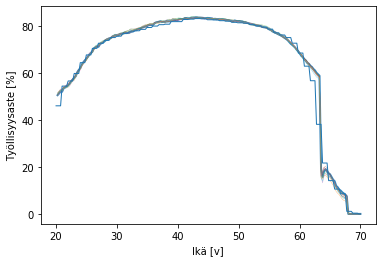

best_emp 3
Vaikutus työllisyyteen keskiarvo 2092404 htv, mediaani 2091086 htv std 5225 htv
   keskiarvo 2260802 työllistä, mediaani 2258908 työllistä, std 4337 työllistä


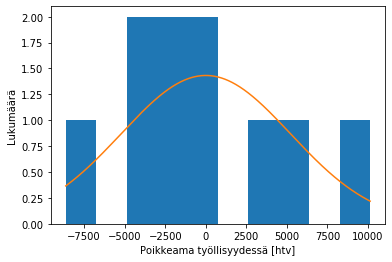

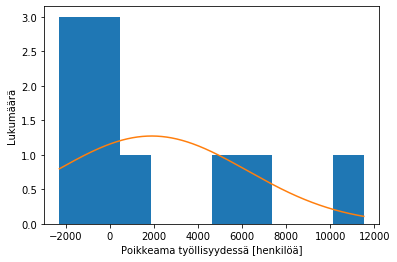

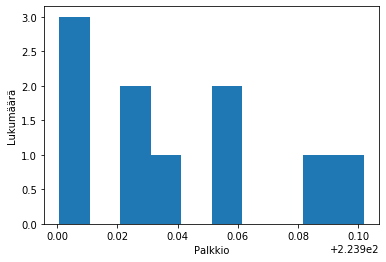

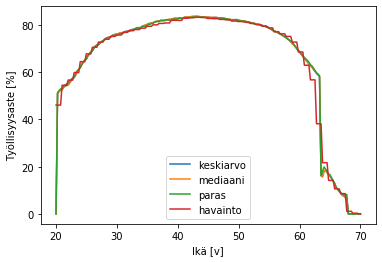

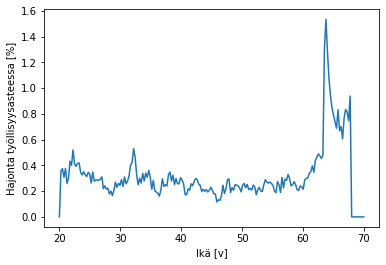

Vaikutus työllisyysasteeseen 21187.0 htv


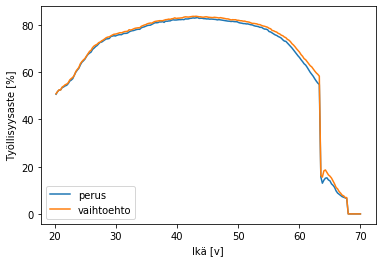

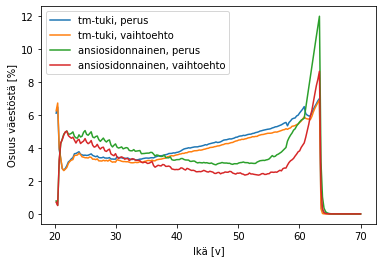

In [10]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus/distrib_porras_v',n=10,startn=0,stats_results='results/porrastus/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/distrib_stats','results/porrastus/distrib_porras_stats')



# Porrastus ilman vaikutusta putkeen

In [4]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,randomness=randomness,porrasta_putki=False)
porrasmalli='best/porrastus_eiputki/malli_porrastus'
cc2_porras.run_distrib(n=50,startn=6,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,verbose=False,
                save=porrasmalli,plot=True,cont=True,start_from=perusmalli,results='results/porrastus_eiputki/distrib_porras',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

computing 1
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 2003     |
| nupdates           | 1        |
| policy_entropy     | 0.989    |
| policy_loss        | 0.000697 |
| total_timesteps    | 0        |
| value_loss         | 0.0143   |
------------------------------

---------------------------------
| explained_variance | 0.996    |
| fps                | 2857     |
| nupdates           | 60       |
| policy_entropy     | 1.01     |
| policy_loss        | 0.000434 |
| total_timesteps    | 143075   |
| value_loss         | 0.0487   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2843     |
| nupdates           | 70       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0187  |
| total_timesteps    | 167325   |
| value_loss         | 0.0241   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2834     |
| nupdates           | 80       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0106   |
| total_timesteps    | 191575   |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2791     |
| nupdates           | 330      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0115  |
| total_timesteps    | 797825   |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2792     |
| nupdates           | 340      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0164  |
| total_timesteps    | 822075   |
| value_loss         | 0.00967  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2792     |
| nupdates           | 350      |
| policy_entropy     | 1.07     |
| policy_loss        | 0.00208  |
| total_timesteps    | 846325   |
| value_loss         | 0.0148   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2804     |
| nupdates           | 600      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0102  |
| total_timesteps    | 1452575  |
| value_loss         | 0.00877  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2804     |
| nupdates           | 610      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00946 |
| total_timesteps    | 1476825  |
| value_loss         | 0.00869  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2805     |
| nupdates           | 620      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0249  |
| total_timesteps    | 1501075  |
| value_loss         | 0.0171   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2813     |
| nupdates           | 870      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0258  |
| total_timesteps    | 2107325  |
| value_loss         | 0.048    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 880      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0201  |
| total_timesteps    | 2131575  |
| value_loss         | 0.0088   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2813     |
| nupdates           | 890      |
| policy_entropy     | 1        |
| policy_loss        | -0.0371  |
| total_timesteps    | 2155825  |
| value_loss         | 0.0183   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1140     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0113  |
| total_timesteps    | 2762075  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1150     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.023   |
| total_timesteps    | 2786325  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2816     |
| nupdates           | 1160     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0172  |
| total_timesteps    | 2810575  |
| value_loss         | 0.00715  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 1410     |
| policy_entropy     | 0.962    |
| policy_loss        | -0.00265 |
| total_timesteps    | 3416825  |
| value_loss         | 0.00973  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2821     |
| nupdates           | 1420     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0292  |
| total_timesteps    | 3441075  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2821     |
| nupdates           | 1430     |
| policy_entropy     | 1        |
| policy_loss        | -0.0155  |
| total_timesteps    | 3465325  |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1778     |
| nupdates           | 1680     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.014   |
| total_timesteps    | 4071575  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1782     |
| nupdates           | 1690     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.015   |
| total_timesteps    | 4095825  |
| value_loss         | 0.0096   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1786     |
| nupdates           | 1700     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.00525 |
| total_timesteps    | 4120075  |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1876     |
| nupdates           | 1950     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00584 |
| total_timesteps    | 4726325  |
| value_loss         | 0.00946  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1879     |
| nupdates           | 1960     |
| policy_entropy     | 1        |
| policy_loss        | -0.0115  |
| total_timesteps    | 4750575  |
| value_loss         | 0.00792  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1883     |
| nupdates           | 1970     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0087  |
| total_timesteps    | 4774825  |
| value_loss         | 0.00672  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 1958     |
| nupdates           | 2220     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0102  |
| total_timesteps    | 5381075  |
| value_loss         | 0.0182   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1961     |
| nupdates           | 2230     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0107  |
| total_timesteps    | 5405325  |
| value_loss         | 0.00785  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 1964     |
| nupdates           | 2240     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0102  |
| total_timesteps    | 5429575  |
| value_loss         | 0.0063   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 2
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2006     |
| nupdates           | 1        |
| policy_entropy     | 0.981    |
| policy_loss        | -0.00839 |
| total_timesteps    | 0        |
| value_loss         | 0.0173   |
---------------------------------
---------------------------------
| explained_variance | 0.916    |
| fps                | 3426     |
| nupdates           | 10       |
| policy_entropy     | 0.976    |
| policy_loss        | 0.405    |
| total_timesteps    | 21825    |
| value_loss         | 1.26     |
---------------------------------
---------------------------------
| explained_variance | 0.905    |
| fps                | 3083     |
| nupdates           | 20       |
| policy_entropy     | 0.962    |
| policy_loss        | 0.0215   |
| total_timesteps    | 46075    |
| value_loss         | 1.17     |
--------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2823     |
| nupdates           | 270      |
| policy_entropy     | 0.989    |
| policy_loss        | -0.00528 |
| total_timesteps    | 652325   |
| value_loss         | 0.00852  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2823     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00809  |
| total_timesteps    | 676575   |
| value_loss         | 0.0357   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2823     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0191  |
| total_timesteps    | 700825   |
| value_loss         | 0.0199   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2826     |
| nupdates           | 540      |
| policy_entropy     | 0.995    |
| policy_loss        | 0.0136   |
| total_timesteps    | 1307075  |
| value_loss         | 0.0542   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2826     |
| nupdates           | 550      |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0215  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0283   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2826     |
| nupdates           | 560      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0259  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2827     |
| nupdates           | 810      |
| policy_entropy     | 0.976    |
| policy_loss        | -0.00963 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0213   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2827     |
| nupdates           | 820      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0132  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0512   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2827     |
| nupdates           | 830      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00017  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2828     |
| nupdates           | 1080     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0179  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2828     |
| nupdates           | 1090     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0103  |
| total_timesteps    | 2640825  |
| value_loss         | 0.00968  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2828     |
| nupdates           | 1100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0236  |
| total_timesteps    | 2665075  |
| value_loss         | 0.019    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 1350     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0136  |
| total_timesteps    | 3271325  |
| value_loss         | 0.00884  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2809      |
| nupdates           | 1360      |
| policy_entropy     | 0.995     |
| policy_loss        | -0.000892 |
| total_timesteps    | 3295575   |
| value_loss         | 0.0102    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0189  |
| total_timesteps    | 3319825  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2812     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0195  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2812     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0255  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0192   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2812     |
| nupdates           | 1640     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00361 |
| total_timesteps    | 3974575  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2806     |
| nupdates           | 1890     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0192  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2806     |
| nupdates           | 1900     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0156  |
| total_timesteps    | 4605075  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2806     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00658 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00669  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 2160     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.00803 |
| total_timesteps    | 5235575  |
| value_loss         | 0.00767  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 2170     |
| policy_entropy     | 0.977    |
| policy_loss        | -0.00385 |
| total_timesteps    | 5259825  |
| value_loss         | 0.00816  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 2180     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0148  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 2430     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0137  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00897  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 2440     |
| policy_entropy     | 0.992    |
| policy_loss        | 0.00494  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00747  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 2450     |
| policy_entropy     | 1        |
| policy_loss        | -0.00158 |
| total_timesteps    | 5938825  |
| value_loss         | 0.00663  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 3
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.998    |
| fps                | 2000     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00111  |
| total_timesteps    | 0        |
| value_loss         | 0.0258   |
---------------------------------
---------------------------------
| explained_variance | 0.83     |
| fps                | 3426     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.611    |
| total_timesteps    | 21825    |
| value_loss         | 2.56     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 3068     |
| nupdates           | 20       |
| policy_entropy     | 0.997    |
| policy_loss        | -0.114   |
| total_timesteps    | 46075    |
| value_loss         | 0.279    |
--------------------------------

---------------------------------
| explained_variance | 0.997    |
| fps                | 2811     |
| nupdates           | 270      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00551 |
| total_timesteps    | 652325   |
| value_loss         | 0.0358   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 280      |
| policy_entropy     | 0.986    |
| policy_loss        | -0.00929 |
| total_timesteps    | 676575   |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2810     |
| nupdates           | 290      |
| policy_entropy     | 0.968    |
| policy_loss        | -0.00164 |
| total_timesteps    | 700825   |
| value_loss         | 0.0295   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2810     |
| nupdates           | 540      |
| policy_entropy     | 1.08     |
| policy_loss        | 0.00374  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2811     |
| nupdates           | 550      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0215  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0584   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2811     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0207  |
| total_timesteps    | 1355575  |
| value_loss         | 0.057    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2812     |
| nupdates           | 810      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0175  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2812     |
| nupdates           | 820      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.00834 |
| total_timesteps    | 1986075  |
| value_loss         | 0.00538  |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2812     |
| nupdates           | 830      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0251  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0463   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1080     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00378 |
| total_timesteps    | 2616575  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1090     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0204  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1100     |
| policy_entropy     | 1        |
| policy_loss        | -0.0114  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0146  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2820     |
| nupdates           | 1360     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0168  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0363   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 1370     |
| policy_entropy     | 0.994    |
| policy_loss        | 0.000309 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00803  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2824     |
| nupdates           | 1620     |
| policy_entropy     | 1        |
| policy_loss        | -0.00107 |
| total_timesteps    | 3926075  |
| value_loss         | 0.0201   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2824     |
| nupdates           | 1630     |
| policy_entropy     | 1        |
| policy_loss        | -0.0156  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0125   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2824     |
| nupdates           | 1640     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0129  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2828     |
| nupdates           | 1890     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0104  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00631  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2828     |
| nupdates           | 1900     |
| policy_entropy     | 0.961    |
| policy_loss        | -0.00392 |
| total_timesteps    | 4605075  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2828     |
| nupdates           | 1910     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0537  |
| total_timesteps    | 4629325  |
| value_loss         | 0.0965   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2830     |
| nupdates           | 2160     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0182  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2831     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0158  |
| total_timesteps    | 5259825  |
| value_loss         | 0.00695  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2831     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0106  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00786  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2832     |
| nupdates           | 2430     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.00543  |
| total_timesteps    | 5890325  |
| value_loss         | 0.00915  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2832     |
| nupdates           | 2440     |
| policy_entropy     | 1        |
| policy_loss        | -0.00315 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00659  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2832     |
| nupdates           | 2450     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0165  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00812  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 4
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1977     |
| nupdates           | 1        |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0164  |
| total_timesteps    | 0        |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.368    |
| fps                | 3385     |
| nupdates           | 10       |
| policy_entropy     | 0.966    |
| policy_loss        | -0.283   |
| total_timesteps    | 21825    |
| value_loss         | 7.7      |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 3070     |
| nupdates           | 20       |
| policy_entropy     | 0.985    |
| policy_loss        | -0.016   |
| total_timesteps    | 46075    |
| value_loss         | 0.69     |
--------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2812     |
| nupdates           | 270      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0369  |
| total_timesteps    | 652325   |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2811     |
| nupdates           | 280      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0162  |
| total_timesteps    | 676575   |
| value_loss         | 0.0216   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0137  |
| total_timesteps    | 700825   |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2807     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0107  |
| total_timesteps    | 1307075  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2807     |
| nupdates           | 550      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0171  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2807     |
| nupdates           | 560      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00253  |
| total_timesteps    | 1355575  |
| value_loss         | 0.0094   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2808     |
| nupdates           | 810      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0102  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0276   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2808     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0338  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0479   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 830      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0179  |
| total_timesteps    | 2010325  |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2811     |
| nupdates           | 1080     |
| policy_entropy     | 0.978    |
| policy_loss        | -0.021   |
| total_timesteps    | 2616575  |
| value_loss         | 0.03     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0197  |
| total_timesteps    | 2640825  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 1100     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0105  |
| total_timesteps    | 2665075  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2814     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0188  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 1360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0103  |
| total_timesteps    | 3295575  |
| value_loss         | 0.00657  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2813     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00301 |
| total_timesteps    | 3319825  |
| value_loss         | 0.00864  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1620     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0155  |
| total_timesteps    | 3926075  |
| value_loss         | 0.00856  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2815     |
| nupdates           | 1630     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0105  |
| total_timesteps    | 3950325  |
| value_loss         | 0.00862  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2815     |
| nupdates           | 1640     |
| policy_entropy     | 1        |
| policy_loss        | -0.0181  |
| total_timesteps    | 3974575  |
| value_loss         | 0.00665  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2817     |
| nupdates           | 1890     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.025   |
| total_timesteps    | 4580825  |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2817     |
| nupdates           | 1900     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.00404 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00779  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2817     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0206  |
| total_timesteps    | 4629325  |
| value_loss         | 0.00848  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2160     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0368  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2170     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0155  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2180     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0118  |
| total_timesteps    | 5284075  |
| value_loss         | 0.00954  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00947 |
| total_timesteps    | 5890325  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2440     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00274 |
| total_timesteps    | 5914575  |
| value_loss         | 0.00732  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2819     |
| nupdates           | 2450     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0126  |
| total_timesteps    | 5938825  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 5
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 2025     |
| nupdates           | 1        |
| policy_entropy     | 0.999    |
| policy_loss        | -0.00599 |
| total_timesteps    | 0        |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.737    |
| fps                | 3377     |
| nupdates           | 10       |
| policy_entropy     | 1        |
| policy_loss        | -0.918   |
| total_timesteps    | 21825    |
| value_loss         | 3.73     |
---------------------------------
---------------------------------
| explained_variance | 0.00843  |
| fps                | 3048     |
| nupdates           | 20       |
| policy_entropy     | 0.947    |
| policy_loss        | -0.823   |
| total_timesteps    | 46075    |
| value_loss         | 13.3     |
--------------------------------

---------------------------------
| explained_variance | 0.999    |
| fps                | 2801     |
| nupdates           | 270      |
| policy_entropy     | 0.966    |
| policy_loss        | -0.0273  |
| total_timesteps    | 652325   |
| value_loss         | 0.0171   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2801     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00134 |
| total_timesteps    | 676575   |
| value_loss         | 0.00963  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2800     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00958 |
| total_timesteps    | 700825   |
| value_loss         | 0.0174   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2801     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00935 |
| total_timesteps    | 1307075  |
| value_loss         | 0.0075   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2801     |
| nupdates           | 550      |
| policy_entropy     | 0.985    |
| policy_loss        | -0.00521 |
| total_timesteps    | 1331325  |
| value_loss         | 0.00981  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2801     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0113   |
| total_timesteps    | 1355575  |
| value_loss         | 0.0421   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2805     |
| nupdates           | 810      |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0177  |
| total_timesteps    | 1961825  |
| value_loss         | 0.0194   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2806     |
| nupdates           | 820      |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0361  |
| total_timesteps    | 1986075  |
| value_loss         | 0.0277   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2806     |
| nupdates           | 830      |
| policy_entropy     | 0.99     |
| policy_loss        | 0.00265  |
| total_timesteps    | 2010325  |
| value_loss         | 0.00785  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2808     |
| nupdates           | 1080     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0178  |
| total_timesteps    | 2616575  |
| value_loss         | 0.00905  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2809     |
| nupdates           | 1090     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.025   |
| total_timesteps    | 2640825  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2809     |
| nupdates           | 1100     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0255  |
| total_timesteps    | 2665075  |
| value_loss         | 0.072    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 1350     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0101  |
| total_timesteps    | 3271325  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2811     |
| nupdates           | 1360     |
| policy_entropy     | 0.986    |
| policy_loss        | 0.00535  |
| total_timesteps    | 3295575  |
| value_loss         | 0.0182   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2812     |
| nupdates           | 1370     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0116  |
| total_timesteps    | 3319825  |
| value_loss         | 0.0064   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2814     |
| nupdates           | 1620     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0149  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2814     |
| nupdates           | 1630     |
| policy_entropy     | 1        |
| policy_loss        | -0.0103  |
| total_timesteps    | 3950325  |
| value_loss         | 0.0154   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2814     |
| nupdates           | 1640     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0142  |
| total_timesteps    | 3974575  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2817     |
| nupdates           | 1890     |
| policy_entropy     | 1        |
| policy_loss        | -0.0068  |
| total_timesteps    | 4580825  |
| value_loss         | 0.00783  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2817     |
| nupdates           | 1900     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00971 |
| total_timesteps    | 4605075  |
| value_loss         | 0.00524  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2817     |
| nupdates           | 1910     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00791 |
| total_timesteps    | 4629325  |
| value_loss         | 0.00788  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2818     |
| nupdates           | 2160     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0176  |
| total_timesteps    | 5235575  |
| value_loss         | 0.00778  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2818     |
| nupdates           | 2170     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0165  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2818     |
| nupdates           | 2180     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0144  |
| total_timesteps    | 5284075  |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 2430     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0219  |
| total_timesteps    | 5890325  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 2440     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.00107  |
| total_timesteps    | 5914575  |
| value_loss         | 0.00812  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2820     |
| nupdates           | 2450     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0108  |
| total_timesteps    | 5938825  |
| value_loss         | 0.00768  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

computing 6
train...
phase 1


KeyboardInterrupt: 

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True



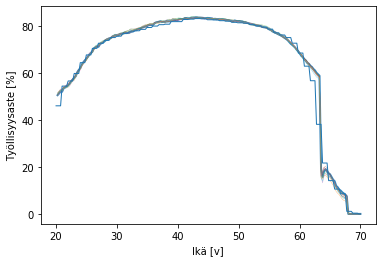

best_emp 3
Vaikutus työllisyyteen keskiarvo 2092404 htv, mediaani 2091086 htv std 5225 htv
   keskiarvo 2260802 työllistä, mediaani 2258908 työllistä, std 4337 työllistä


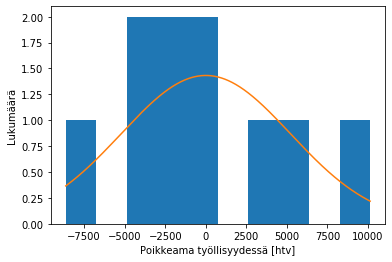

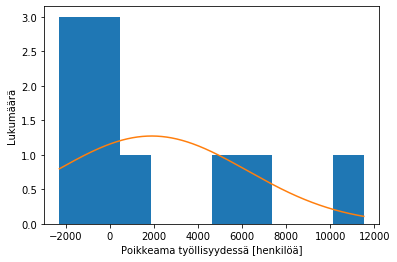

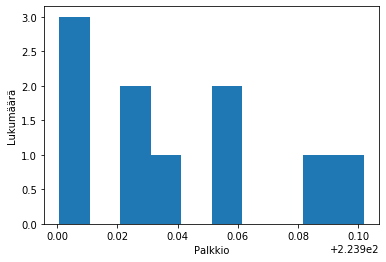

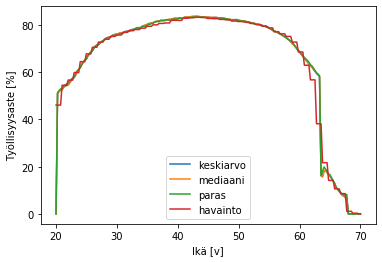

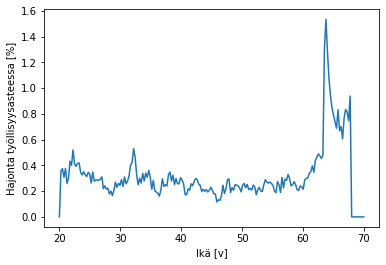

Vaikutus työllisyysasteeseen 21187.0 htv


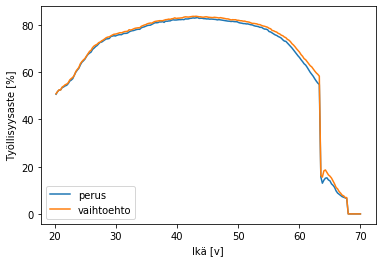

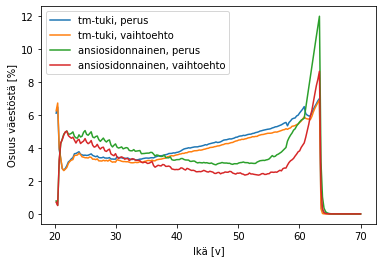

In [10]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus_eiputki/distrib_porras_v',n=10,startn=0,stats_results='results/porrastus/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/distrib_stats','results/porrastus_eiputki/distrib_porras_stats')

# TOE 12 kk

In [ ]:
cc2_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,perustulo=False,randomness=randomness)
toemalli='best/toe12/malli_toe'
cc2_toe.run_distrib(n=50,startn=18,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,
                save=toemalli,plot=True,cont=True,start_from=perusmalli,results='results/toe12/distrib_toe12',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True



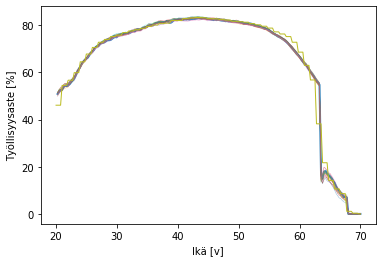

best_emp 5
Vaikutus työllisyyteen keskiarvo 2066513 htv, mediaani 2068644 htv std 7169 htv
   keskiarvo 2234665 työllistä, mediaani 2235197 työllistä, std 7383 työllistä


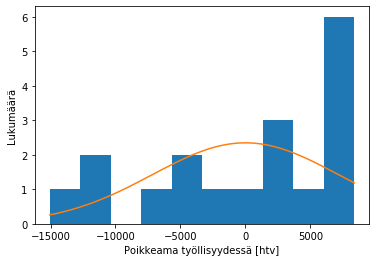

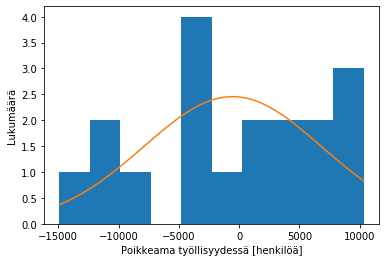

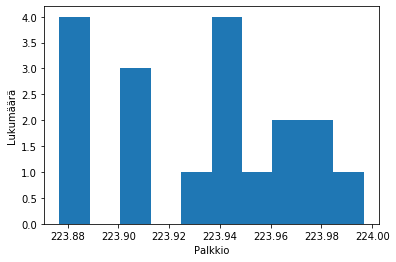

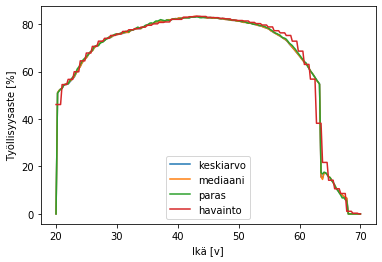

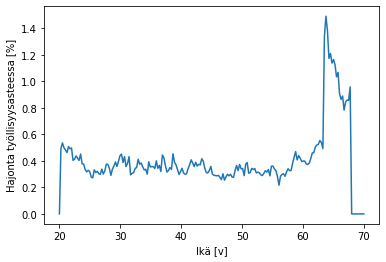

Vaikutus työllisyysasteeseen -1255.0 htv


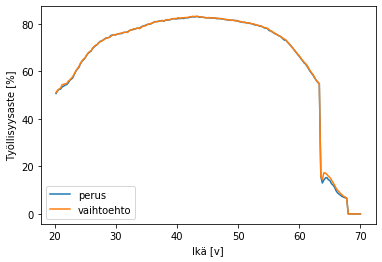

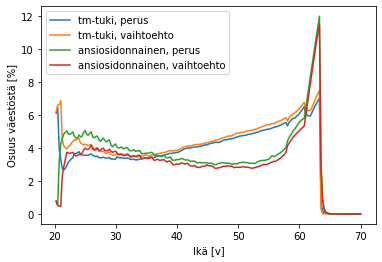

In [9]:
cc2_toe=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_toe.render_distrib(load='results/toe12/distrib_toe12_v',n=18,startn=0,stats_results='results/toe12/distrib_toe12_stats')
cc2_toe.compare_distrib('results/distrib_stats','results/toe12/distrib_toe12_stats')

# Lyhempi työttömyysturva

In [ ]:
cc2_350=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,randomness=randomness)
lyhytmalli='best/350/malli_350'
cc2_350.run_distrib(n=50,startn=0,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,
                save=lyhytmalli,plot=True,cont=True,start_from=perusmalli,results='results/350/distrib_350',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

In [ ]:
cc2_350=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_350.render_distrib(load='results/350/distrib_350_v',n=1,startn=0,stats_results='results/350/distrib_350_stats')
cc2_350.compare_distrib('results/distrib_stats','results/350/distrib_350_stats')